<a href="https://colab.research.google.com/github/thad75/TP_ENSEA_ELEVE/blob/main/2A/Option%20IA/Introduction_to_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown
!gdown --id 12PZB5hWpwAyRuSWAgkaFdZdZluGf8_6Z
!gdown --id 1g1CEUs8BvSJXSDroHgjUbTa3izGp9WMO

Downloading...
From: https://drive.google.com/uc?id=12PZB5hWpwAyRuSWAgkaFdZdZluGf8_6Z
To: /content/test_signs.h5
100% 1.48M/1.48M [00:00<00:00, 174MB/s]
Downloading...
From: https://drive.google.com/uc?id=1g1CEUs8BvSJXSDroHgjUbTa3izGp9WMO
To: /content/train_signs.h5
100% 13.3M/13.3M [00:00<00:00, 56.7MB/s]


# Disclaimer 

Before beginning this lab, please activate a GPU by going into :     
- Exécution
- Modifier le type d'éxecution
- GPU 

# DNNs with TensorFlow

Welcome to the Deep Learning Lab sessions. As you had a slight introduction to Deep Learning through the Course, you will now apply it through this izi pizi labs.
This lab will be done using TensorFlow from Google. 
You will learn to do the following in TensorFlow: 

- Initialize variables
- Start your own session
- Train algorithms 
- Implement a Neural Network

This part of the lab is splitted in two parts :
- Using Tensorflow
- Creating and Performing Classification using TF.

<img src="https://www.memesmonkey.com/images/memesmonkey/3f/3fd47d627866ac3f67bc4a38b0b2941c.jpeg">


# First Time Hun ?

So this might be your first time using Deep Learning for a certain task. So in this lab we will perform a certain Task : Classification. We will classify hands. Hun.

When training a DL Algorithm you need few things : 
* A Dataset
* A Model
* A Learning Algorithm
* Something more ?

So we will navigate through each of these points to train a Model to perform Hand Signs Classification.

<img src = "https://i.kym-cdn.com/photos/images/original/000/123/620/Oh-boy-here-we-go.jpg">



# I - Dataset : SIGNS


We wil use SIGNS Dataset. Let's first have some insight look on our Dataset
Load the train and test datasets


In [74]:
import h5py
import numpy as np
import tensorflow as tf
import math
import matplotlib.pyplot as plt

# TODO : load the h5 files in the correct variables
train_dataset = h5py.File('/content/train_signs.h5', "r")
test_dataset = h5py.File('/content/test_signs.h5', "r")

# TODO : print the keys of each variables. 
# Questions: Are the keys different ? 
print(train_dataset.keys())
print(test_dataset.keys())

# TODO : create x_train, y_train, x_test, y_test and convert them to array using numpy
# Questions : What is the length of each Dataset.
# Questions : What are the labels, what are our images ?

print(len(train_dataset))
x_train = np.array(train_dataset['train_set_x'][:])
y_train = np.array(train_dataset['train_set_y'][:]).reshape((-1))

x_test = np.array(test_dataset['test_set_x'][:])
y_test = np.array(test_dataset['test_set_y'][:]).reshape((-1))

# TODO : load the classes in an array. 
# Questions : How many labels should you have ? (Count your fingers)
classes = np.array(test_dataset["list_classes"][:])
print(classes)
print(x_train.shape, y_train.shape, type(x_train))

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
<KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>
3
[0 1 2 3 4 5]
(1080, 64, 64, 3) (1080,) <class 'numpy.ndarray'>


In [75]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [76]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

Few questions on the Dataset: 
* How many elements do you have in your Train and Test Datasets ? Explain the shape of the Train Dataset
* What is the size of one element of the Dataset ?
* Are the images RGB images ?

Plot some images from the train Dataset with their labels along using Matplotlib

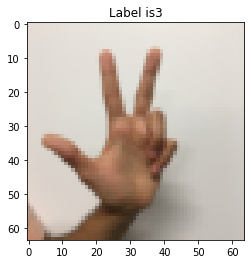

In [51]:
index = 1070
plt.title("Label is" + str(np.squeeze(y_train[ index])))
plt.imshow(x_train[index])


So now you have some understanding of the Dataset. Let's try things

II- The Model : Your Choice

We are going to guide you a lil bit for this. In fact, you can create whatever model you want. However, they might not be as effective as some other networks.
In this part, we will try Dense Layers.

<img src = "https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/ANN-Graph.gif" height=300 >


* What is the other name of a Dense Layer ?


To create this FC model, you have to understand few things :
* The input Layer will have a Fixed number of Neurons that must correspond to the image's size.
* Between the Layers, you must apply some non-linearity so that the model learns complex features.
* You have to compromise between the Shallowness or Depth of your Model. You'll understand why in the next lab.

<img src="https://miro.medium.com/max/1400/1*E4_pTJctmAofSRpZCZbv-g.jpeg" height=300>


Let's create a simple Sequential Model :    
* an Input Layer
* a Hidden Layer
* an Output Layer

(Like the picture above Andrew)

In [77]:
# TODO : Create a Simple 3 layer model.
# Question : What is the input shape ?
# Question : What is the output shape ?
# Question : What non linearity must we add ?

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(64,64,3)),
  tf.keras.layers.Dense(64*64*3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(5)
])

Some questions related to Memes on Activation Functions :

<img src="https://2.bp.blogspot.com/-IdxHoo3lTrU/XHXNi8HM4_I/AAAAAAAAOhY/xTrp-Z8yYjY6NVBs-PXHw2Gho53vU90DgCLcBGAs/s1600/52386901_10157143758983669_1120348777576660992_o.jpg" height = 400>

*  How do you understand the ReLU function as an activation of a layer ?

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQGVkqoa4YitmdIj-pCt88odvoscPbgocSPDQ&usqp=CAU" >

* Can we use any activation functions ? Take the example of multiclass classification, can we use the same activation function in the last layer than in the earlier layers ?

III- The Loss 

Now we need something to tell our model if it does well or no. Let's say your model predicts something. We need to compute how far the prediction is compared to the real label. 


We will use the cross entropy. As some of you might see in Information Theory, Cross Entropy measures the difference between two Probabilty Distributions.


In fact, Tensorflow already has coded a bunch of Loss for us. You can have a look at all the existing loss here :
* https://www.tensorflow.org/api_docs/python/tf/keras/losses/Loss


* What loss will we be using here ?

If you don't know how to answer the previous question, ask yourself these things :

* Do we have labels ?
* What task are we performing ? Regression or Classification ?
* What must be the output of our model ?


In [78]:
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

In [62]:
loss2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

IV - The Optimizer

So at the end of the Model, we can compute a loss. We need to back-propagate the loss to all the layers so that it sees and understands the end result of a prediction and search for a Local-Global Optimum. You have plenty of optimizers available, the simplest is Gradient Descent. We pratically use Stochastic Gradient Descent in order to find a Global Minimum where the model should be performing 'well'.

<img src="https://www.memecreator.org/static/images/memes/5296549.jpg" height = 300>


Have a look at the existing optimizers in TensorFlow :    
* https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

We will use ADAM. In fact, we can use SGD or any other Optimizer. However, ADAM
for Adaptive Moment Estimation

We will use ADAM optimizer here. Why ? ADAM is more robust than SGD. (and it has more things such as per parameter learning rate adaptation that improves performance on sparse gradient and other things (To quote Andrew NG : Don't worry about it if you don't understand it) 

<img src="https://i.pinimg.com/474x/7b/58/bb/7b58bb3b853ff61ed8873aeb711cb3b6.jpg">

In [79]:
# TODO : Load Adam optimizer and set a learning rate.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)

V - The Compilation

Now that we have all we need, we have to compile the model with all the preceding stuff. 

That's where TensorFlow is cool. It has a compile method that compiles everything for you.

In [86]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=[tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy', dtype=None)])

VI- The Training 

When you train, you become fit. In Deep Learning, we fit a distribution of Data to the model so that it learns a specific task.

Again, TensorFlow has a great method that fits data for you.

In [11]:
print(train_dataset.batch(1))

<BatchDataset shapes: ((None, None, 64, 64, 3), (None, None)), types: (tf.uint8, tf.int64)>


In [82]:
model.fit(train_dataset,epochs=5)

Epoch 1/5


ValueError: ignored

AW.. It doesn't work ....


<img src="https://media.npr.org/assets/img/2016/03/29/ap_090911089838_sq-3271237f28995f6530d9634ff27228cae88e3440-s900-c85.webp" height = 200>

In fact, it is normal. Let's have a closer look on our Dataset and our Model. Especially the last layer.

let's have a look at the Dataset labels first.

In [57]:
print(y_train)

[[5]
 [0]
 [2]
 ...
 [2]
 [4]
 [5]]


As you might see these are numbers between 0,5. The model will have issues to predict these numbers. In fact, we put a SoftMax activation layer at the end. The SoftMax makes the model behaves as follows : 

Let's say that the Last Layer has 6 Neurons. We want to train the model so that 
when the model sees an image of 0 the 1rst neuron has the highest value. When it sees an image of 1 the 2nd neurons has the highest value.. and so on.

That means that we need to change our label to something that helps us to learn to activate the wanted neuron for an image.

Let's do some 1-Hot Encoding.

<img src= "https://image.slidesharecdn.com/cnn-tsopnang-180418232518/95/demo3-convolutional-neural-network-22-638.jpg?cb=1524094111">







In [83]:
# TODO : Create a function that 1-Hot encodes a number into a given size vector. Or have a look at this : https://www.tensorflow.org/api_docs/python/tf/one_hot

y_train_oh = tf.one_hot(y_train, 5)
y_test_oh = tf.one_hot(y_test, 5)
print(y_train_oh)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train_oh))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test_oh))

BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

tf.Tensor(
[[0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]], shape=(1080, 5), dtype=float32)


In [67]:
print(train_dataset)

<BatchDataset shapes: ((None, 64, 64, 3), (None, 1, 5)), types: (tf.uint8, tf.float32)>


Ok let's try again

In [87]:
model.fit(train_dataset,epochs=15)

Epoch 1/15
34/34 [==============================] - 1s 34ms/step - loss: 3124170.7500 - categorical_accuracy: 0.1926
Epoch 2/15
34/34 [==============================] - 1s 35ms/step - loss: 12409.0010 - categorical_accuracy: 0.2093
Epoch 3/15
34/34 [==============================] - 1s 34ms/step - loss: 8246.6846 - categorical_accuracy: 0.2000
Epoch 4/15
34/34 [==============================] - 1s 33ms/step - loss: 1.3502 - categorical_accuracy: 0.1676
Epoch 5/15
34/34 [==============================] - 1s 33ms/step - loss: 1019.1524 - categorical_accuracy: 0.1685
Epoch 6/15
34/34 [==============================] - 1s 33ms/step - loss: 1.3409 - categorical_accuracy: 0.1926
Epoch 7/15
34/34 [==============================] - 1s 32ms/step - loss: 1.3413 - categorical_accuracy: 0.1944
Epoch 8/15
34/34 [==============================] - 1s 33ms/step - loss: 1.3434 - categorical_accuracy: 0.1491
Epoch 9/15
34/34 [==============================] - 1s 33ms/step - loss: 1.3442 - categorical_ac

In [24]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape)

(60000, 28, 28)


VII- The Evalutation

Nonw that we trained the model, let's evaluate it on the test dataset. Again, TensforFlow has this great .evaluate() method that evaluates your model to the test dataset.

* Evaluate your trained model to the Test Dataset.

In [88]:
model.evaluate(test_dataset)

4/4 [==============================] - 0s 8ms/step - loss: 1.3412 - categorical_accuracy: 0.1833


[1.341188907623291, 0.18333333730697632]